# Lab 2: Introduction to Curve Fitting in ROOT

![alt-text](https://root.cern.ch/root/htmldoc/guides/users-guide/pictures/03000070.png "")


## Table of Contents
1. **[Fit Example](#fit-example)**
2. **[Creating a Fitting Function](#creating-fitting-function)**  
   2.1. [The TF1 Class](#tf1-class)  
   2.2. [Predefined Functions](#predefined-functions)  
   2.3. [Exercise](#create-fit-func-exercise)  
3. **[The Fit Method](#fit-method)**  
   3.1. [Fitting a Histogram](#fitting-histogram)  
   3.2. [Fitting Options](#fit-options)  
   3.3. [Exercise](#fit-exercise)  
4. **[Displaying Histograms](#display-histograms)**  
   4.1. [TCanvas](#tcanvas)  
   4.2. [Draw()](#draw)  
   4.3. [Exercise](#draw-exercise)  

## 1. Fit Example <a name="fit-example" />
Below is an example of fitting a function to a histogram. We will break down this code and see the different ways you can fit a function to data and discuss why we want to do this.

In [1]:
import ROOT

Welcome to JupyROOT 6.14/04


 FCN=108.228 FROM MIGRAD    STATUS=CONVERGED      31 CALLS          32 TOTAL
                     EDM=7.85278e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.01655e+02   2.35238e+00   6.51768e-03   9.81160e-11
   2  p1           2.57886e+02   3.12924e+00   8.67012e-03   6.14648e-11
 FCN=116.314 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=5.11505e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.81227e+02   3.47005e+00   1.49604e-02  -1.83188e-05
   2  Mean        -2.89024e-02   8.51532e-03   4.49625e-05   1.77740e-03
   3  Sigma        8.41808e-01   6.06418e-03   1.02743e-05   2.07775e-02


Warning in <TROOT::Append>: Replacing existing TH1: 1d (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name
Info in <TCanvas::Print>: png file fitted_hist.png has been created


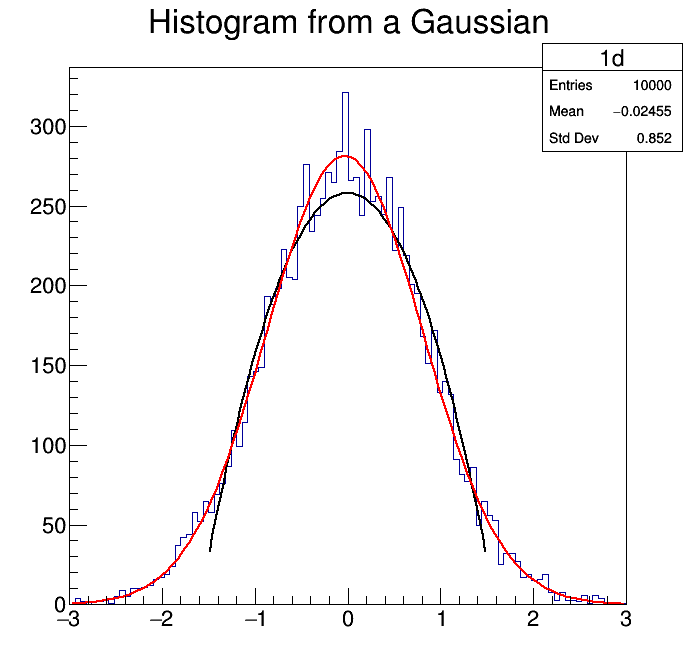

In [14]:
# 1D Histogram
one_d_hist = ROOT.TH1F("1d", "Histogram from a Gaussian", 100, -3, 3)
one_d_hist.FillRandom("gaus", 10000)

fitting_function = ROOT.TF1("name", "[0]*x^2 + [1]", -1.5, 1.5)
fitting_function.SetParameter(0, 20)
fitting_function.SetParameter(1, 200)
fitting_function.SetLineColor(1)
one_d_hist.Fit("name", "R")
one_d_hist.Fit("gaus", "+")

canvas = ROOT.TCanvas("canvas_name", "canvas_name", 700, 700)
one_d_hist.Draw()
canvas.SaveAs("fitted_hist.png")
canvas.Draw()

## 2. Creating a Fitting Function <a name="creating-fitting-function" />
The class that is used to represent a function is the `TF1` class. The `TF1` class is used to represent any function. You can specify parameters than are allowed to change their value in the definition of the function so that we can change these parameters in an attempt to fit this function as close to the histogram as possible. 

There are two classes of functions available to use: user-defined functions and predefined functions. We will first cover user-defined functions as they can do everything a predefined function can and then will later list some of the predefined functions. You need to be careful when using a predefined function to ensure that the function will be able to fit the data correctly.


### 2.1 The TF1 Class <a name="tf1-class" />
To create a user-defined fitting function, you will type `fitting_function = ROOT.TF1("name", "expression", xmin, xmax)`, where `name` is the name of the funciton, `expression` is the mathematical expression of the function, `xmin` is the minimum x value the function covers, and `xmax` is the maximum x value the function covers. An example of this is:
```python
fitting_function = ROOT.TF1("quadratic", "[0]*x^2 + [1]", -1.5, 1.5)
```
The mathematical expression for this function is equivalent to:
$$
f(x) = ax^2 + c
$$
where $a$ and $c$ can be any real value. `[x]` in the expression denotes a variable that can be changed to any value to help fit the function where x is the ID of the parameter. This function is also only defined on the inteval $[-1.5, 1.5]$.

Sometimes when you try fitting your function you will realize that you are getting a very bad fit to the data even though you know the data kind of follows this function in this range. One possible reason for this is that the adjustable parameters are starting at initial values that make it hard for the program to adjust it to the correct values to accurately fit the data. We can help the program in fitting these functions by guessing what the initial values should be and by setting ranges on what values the variable can take on. To set the initial values of the parameters we can use the `SetParameter` or the `SetParameters` methods.

```python
fitting_function.SetParameter(0, 20)
fitting_function.SetParameter(1, 200)
```
or
```python
fitting_function.SetParameters(20, 200)
```
In both cases we are setting the variable `[0]` to 20 and the variable `[1]` to 200. To set limits we will use the method `SetParLimits`.

```python
fitting_function.SetParLimits(0, 0, 100)
fitting_function.SetParLimits(1, 0, 1000)
```
__NOTE__: Be careful when setting limits on parameters. Only set limits when you know the variable absolutely should not be outside of these ranges. Otherwise, you could be obtaining a sub-optimal fit. One way to see this happening is if the fitter is choosing one of your limits as the best value for the parameter.

### 2.2 Predefined Functions <a name="predefined-functions" />
There are a lot of functions that are used over and over to fit histograms, so ROOT has gone out of the way and defined some of these functions for you. I will list the `"name"` of the popular ones here but you may be able to find more if you search through ROOT's documentation.

* `"gaus"`: A Gaussian function with 3 parameters: $A$, $\mu$, and $\sigma$.
$$
f(x) = Ae^{-\left(\frac{x-\mu}{\sigma}\right)^2}
$$
* `"expo"`: An exponential function with 2 parameters: $a$ and $b$.
$$
f(x) = e^{a + bx}
$$
* `"pol N"`: A polynomial of degree N, where N is between 0 and 9.
$$
f(x) = a_0 + a_1x + a_2x^2 + ... + a_Nx^N
$$
* `"chebyshev N"`: A Chebyshev polynomial of degree N, where N is between 0 and 9.
$$
f(x) = a_0 + a_1x + a_2\left(2x^2 - 1\right) + ... + a_NT_N(x)
$$
* `"gausn"`: The normalized Gaussian function with 3 parameters: $A$, $\mu$, and $\sigma$.
$$
f(x) = \frac{A}{\sigma \sqrt{2\pi}}e^{-\left(\frac{x-\mu}{\sigma}\right)^2}
$$

### 2.3 Exercise <a name = "create-fit-func-exercise">
Create a fitting function the matches the function:
$$
f(x) = \frac{2}{R^2\pi}\sqrt{R^2 - x^2}
$$
where R is your variable that is allowed to change its value, on the interval $[-5, 5]$.

## 3. The Fit Method <a name = "fit-method">
Now that we know how to create functions that can be fitted to histograms, we need to actually fit these functions to our histograms. This is very easy to do and can be done with the `Fit` method belonging to the `TH1` class.

### 3.1 Fitting a Histogram <a name = "fitting-histogram">
First we need to create a histogram. We will just create a histogram and fill it from a Gaussian.
```python
one_d_hist = ROOT.TH1F("1d", "Histogram from a Gaussian", 100, -3, 3)
one_d_hist.FillRandom("gaus", 10000)
```
Now we simply pass the name of the fitting function we want to use through `Fit()` and the function will be fitted to the histogram.
```python
one_d_hist.Fit("quadratic")
```
This is fitting the histogram to our previously user-defined fitting function in [2.1. The TF1 Class](#tf1-class). If we wanted to use a predefined function we could simply do this as so:
```python
one_d_hist.Fit("gaus")
```
    
Fitting is really that easy!


### 3.2 Fitting Options <a name = "fit-options">
There are plenty of options that can be used in performing your fit so as to ensure that you get the best fit or to simply change what is happening to the fit. Here is a list of some of the more predominant options, but a full list can be found [here](#https://root.cern.ch/doc/master/classTH1.html#a7e7d34c91d5ebab4fc9bba3ca47dabdd).
    
* `"L"`: Use Loglikelihood method (default is chisquare method). To be used when the histogram represents counts
* `"Q"`: Quiet mode (minimum printing)
* `"V"`: Verbose mode (default is between Q and V)
* `"E"`: Perform better Errors estimation using Minos technique
* `"R"`: Use the Range specified in the function range
* `"0"`: Do not plot the result of the fit. By default the fitted function is drawn unless the option "N" is specified.
* `"+"`: Add this new fitted function to the list of fitted functions (by default, any previous function is deleted)
* `"F"`: If fitting a polN, switch to minuit fitter

### 3.3 Exercise <a name = "fit-exercise">

Fit a falling and rising exponential on the intervals $[0, 3]$ and $[-3, 0]$, respectively, for the below histogram. Draw the resultant histogram and fits and ensure both fits are on the same plot.

In [ ]:
hist = ROOT.TH1F("1d", "Histogram from a Gaussian", 100, -3, 3)
one_d_hist.FillRandom("gaus", 10000)

# Fitting goes here
falling_expo = ROOT.
rising_expo = ROOT.

one_d_hist.Fit("")
one_d_hist.Fit("")